In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
import math
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.filters import sobel,laplace
from PIL import Image
%matplotlib inline

In [2]:
kodim04 = np.asarray(Image.open('Kodak/kodim04.png'))

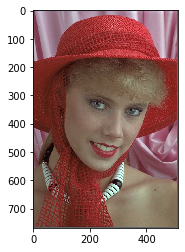

In [3]:
plt.imshow(kodim04)

In [4]:
kodim04 = np.float32(kodim04/255)

In [5]:
def coords_to_binary(coordinates, shape):
    nbits0 = int(math.ceil(math.log(shape[0], 2)))
    nbits1 = int(math.ceil(math.log(shape[1], 2)))
    
    bin0 = format(coordinates[0], '0' + (str(nbits0) + 'b'))
    bin1 = format(coordinates[1], '0' + (str(nbits1) + 'b'))
    
    return np.array(list(map(int, bin0 + bin1)))

In [6]:
def gen_training_binary_coords(image):
    shape = (image.shape[0], image.shape[1])
    
    data = np.empty((shape[0]*shape[1], int(math.ceil(math.log(shape[0],2))) + int(math.ceil(math.log(shape[1],2))) + 3))
    for i in range(shape[0]):
        for j in range(shape[1]):
            binarr = coords_to_binary((i,j),shape)
            data[shape[1]*i + j,:-3] = binarr
            data[shape[1]*i + j,-3:] = image[i,j]
            
    return data

In [10]:
train = gen_training_binary_coords(kodim04)

In [11]:
X = train[:, :-3]
y = train[:,-3:]

In [12]:
X[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomUniform

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [14]:
from tensorflow.math import sin as Sine

In [15]:
w0 = 30
n = len(X[0])

In [16]:
def hfSin(x):
    return Sine(w0*x)


In [17]:
n

19

In [18]:
model = Sequential()
model.add(Dense(4*n, activation='tanh'))
model.add(Dense(4*n, activation='tanh'))
model.add(Dense(4*n, activation='tanh'))
model.add(Dense(4*n, activation='tanh'))
model.add(Dense(4*n, activation='tanh'))
model.add(Dense(n, activation='tanh'))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='mse', optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [32]:
#SIREN
model = Sequential()
model.add(Dense(4*n, activation=hfSin, kernel_initializer=RandomUniform(minval=-1/n, maxval=1/n)))
model.add(Dense(4*n, activation=hfSin, kernel_initializer=RandomUniform(minval=-np.sqrt(6/n)/w0, maxval=np.sqrt(6/n)/w0)))
model.add(Dense(4*n, activation=hfSin, kernel_initializer=RandomUniform(minval=-np.sqrt(6/n)/w0, maxval=np.sqrt(6/n)/w0)))
model.add(Dense(4*n, activation=hfSin, kernel_initializer=RandomUniform(minval=-np.sqrt(6/n)/w0, maxval=np.sqrt(6/n)/w0)))
model.add(Dense(4*n, activation=hfSin, kernel_initializer=RandomUniform(minval=-np.sqrt(6/n)/w0, maxval=np.sqrt(6/n)/w0)))
model.add(Dense(n, activation=hfSin, kernel_initializer=RandomUniform(minval=-np.sqrt(6/n)/w0, maxval=np.sqrt(6/n)/w0)))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='mse', optimizer='adam')

In [19]:
from tensorflow import device
with device('/GPU:0'):
    model.fit(x=X, y=y, epochs= 1000, batch_size = 6144, verbose=1)

Epoch 1/1000
393216/393216 [==============================] - 4s 10us/sample - loss: 0.0245
Epoch 2/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0196
Epoch 3/1000
393216/393216 [==============================] - 3s 8us/sample - loss: 0.0160
Epoch 4/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0129
Epoch 5/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0115
Epoch 6/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0103
Epoch 7/1000
393216/393216 [==============================] - 3s 6us/sample - loss: 0.0092
Epoch 8/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0084
Epoch 9/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0078
Epoch 10/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0074
Epoch 11/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0

393216/393216 [==============================] - 3s 7us/sample - loss: 0.0024
Epoch 91/1000
393216/393216 [==============================] - 3s 8us/sample - loss: 0.0024
Epoch 92/1000
393216/393216 [==============================] - 4s 10us/sample - loss: 0.0023
Epoch 93/1000
393216/393216 [==============================] - 4s 9us/sample - loss: 0.0023
Epoch 94/1000
393216/393216 [==============================] - 3s 8us/sample - loss: 0.0023
Epoch 95/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0023
Epoch 96/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0023
Epoch 97/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0023
Epoch 98/1000
393216/393216 [==============================] - 3s 8us/sample - loss: 0.0023
Epoch 99/1000
393216/393216 [==============================] - 3s 8us/sample - loss: 0.0023
Epoch 100/1000
393216/393216 [==============================] - 3s 8us/sample - loss: 0.0023


393216/393216 [==============================] - 3s 7us/sample - loss: 0.0018
Epoch 178/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0018
Epoch 179/1000
393216/393216 [==============================] - 3s 6us/sample - loss: 0.0018
Epoch 180/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0018
Epoch 181/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0018
Epoch 182/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0017
Epoch 183/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0017
Epoch 184/1000
393216/393216 [==============================] - 3s 8us/sample - loss: 0.0017
Epoch 185/1000
393216/393216 [==============================] - 3s 8us/sample - loss: 0.0017
Epoch 186/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0017
Epoch 187/1000
393216/393216 [==============================] - 3s 7us/sample - loss:

393216/393216 [==============================] - 3s 7us/sample - loss: 0.0015
Epoch 265/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0015
Epoch 266/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0015
Epoch 267/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0015
Epoch 268/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0015
Epoch 269/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0015
Epoch 270/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0015
Epoch 271/1000
393216/393216 [==============================] - 3s 8us/sample - loss: 0.0015
Epoch 272/1000
393216/393216 [==============================] - 3s 8us/sample - loss: 0.0015
Epoch 273/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0015
Epoch 274/1000
393216/393216 [==============================] - 3s 7us/sample - loss:

393216/393216 [==============================] - 3s 7us/sample - loss: 0.0014
Epoch 352/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0014
Epoch 353/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0014
Epoch 354/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0014
Epoch 355/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0014
Epoch 356/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0014
Epoch 357/1000
393216/393216 [==============================] - 3s 6us/sample - loss: 0.0014
Epoch 358/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0014
Epoch 359/1000
393216/393216 [==============================] - 3s 6us/sample - loss: 0.0014
Epoch 360/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0014
Epoch 361/1000
393216/393216 [==============================] - 3s 8us/sample - loss:

393216/393216 [==============================] - 3s 7us/sample - loss: 0.0013 0s - loss
Epoch 439/1000
393216/393216 [==============================] - 3s 6us/sample - loss: 0.0013
Epoch 440/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0013
Epoch 441/1000
393216/393216 [==============================] - 2s 6us/sample - loss: 0.0013
Epoch 442/1000
393216/393216 [==============================] - 3s 6us/sample - loss: 0.0013
Epoch 443/1000
393216/393216 [==============================] - 3s 6us/sample - loss: 0.0013
Epoch 444/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0013
Epoch 445/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0013
Epoch 446/1000
393216/393216 [==============================] - 3s 8us/sample - loss: 0.0013
Epoch 447/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0013
Epoch 448/1000
393216/393216 [==============================] - 3s 7us/samp

393216/393216 [==============================] - 3s 8us/sample - loss: 0.0012
Epoch 527/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0012
Epoch 528/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0012
Epoch 529/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0012
Epoch 530/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0012
Epoch 531/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0012
Epoch 532/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0012
Epoch 533/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0012
Epoch 534/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0012
Epoch 535/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0012
Epoch 536/1000
393216/393216 [==============================] - 3s 7us/sample - loss:

393216/393216 [==============================] - 3s 8us/sample - loss: 0.0011
Epoch 615/1000
393216/393216 [==============================] - 3s 9us/sample - loss: 0.0011
Epoch 616/1000
393216/393216 [==============================] - 4s 9us/sample - loss: 0.0012
Epoch 617/1000
393216/393216 [==============================] - 3s 9us/sample - loss: 0.0011
Epoch 618/1000
393216/393216 [==============================] - 3s 8us/sample - loss: 0.0011
Epoch 619/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 620/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 621/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 622/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 623/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 624/1000
393216/393216 [==============================] - 3s 7us/sample - loss:

393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 702/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 703/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 704/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 705/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 706/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 707/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 708/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 709/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 710/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 711/1000
393216/393216 [==============================] - 3s 7us/sample - loss:

393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 790/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 791/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 792/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 793/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 794/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 795/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 796/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 797/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 798/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0011
Epoch 799/1000
393216/393216 [==============================] - 3s 7us/sample - loss:

393216/393216 [==============================] - 3s 7us/sample - loss: 0.0010
Epoch 877/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0010
Epoch 878/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0010
Epoch 879/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0010
Epoch 880/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0010
Epoch 881/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0010
Epoch 882/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0010
Epoch 883/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0010
Epoch 884/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0010
Epoch 885/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0010
Epoch 886/1000
393216/393216 [==============================] - 3s 7us/sample - loss:

393216/393216 [==============================] - 3s 6us/sample - loss: 0.0010
Epoch 964/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0010
Epoch 965/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0010
Epoch 966/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0010
Epoch 967/1000
393216/393216 [==============================] - 2s 6us/sample - loss: 9.9871e-04
Epoch 968/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0010
Epoch 969/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0010
Epoch 970/1000
393216/393216 [==============================] - 3s 7us/sample - loss: 0.0010
Epoch 971/1000
393216/393216 [==============================] - 3s 6us/sample - loss: 0.0010
Epoch 972/1000
393216/393216 [==============================] - 3s 6us/sample - loss: 9.9855e-04
Epoch 973/1000
393216/393216 [==============================] - 3s 7us/sample

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  1520      
_________________________________________________________________
dense_1 (Dense)              multiple                  5852      
_________________________________________________________________
dense_2 (Dense)              multiple                  5852      
_________________________________________________________________
dense_3 (Dense)              multiple                  5852      
_________________________________________________________________
dense_4 (Dense)              multiple                  5852      
_________________________________________________________________
dense_5 (Dense)              multiple                  1463      
_________________________________________________________________
dense_6 (Dense)              multiple                  6

### 10000 epochs, batch size 6144. Layers: 76,76,76,76,76,19 tanh + 3 sigmoid output

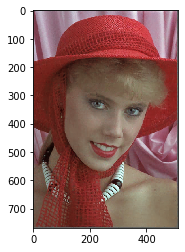

In [16]:
result = model.predict(X).reshape(kodim04.shape)
plt.imshow(result)

In [21]:
from imageio import imwrite

In [18]:
imwrite('test2.png',result)

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


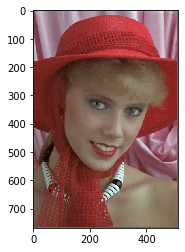

In [20]:
result = model.predict(X).reshape(kodim04.shape)
plt.imshow(result)

In [27]:
print('ssim with base image: ' + str(ssim(kodim04,result,multichannel=True)))
print('mse with base image: ' + str(mse(kodim04,result)))
print('PSNR: ' + str(psnr(kodim04,result)))

ssim with base image: 0.8824187013110442
mse with base image: 0.0009811944973757277
PSNR: 30.082448960201344


In [22]:
imwrite('test.png',result)

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [33]:
from skimage.restoration import denoise_tv_bregman as tvb


In [35]:
denoised = tvb(result,weight=50)

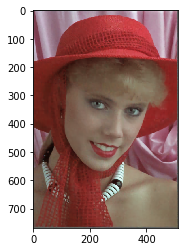

In [36]:
plt.imshow(denoised)

In [37]:
imwrite('test2.png',denoised)

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [38]:
print('ssim with base image: ' + str(ssim(kodim04,denoised,multichannel=True)))
print('mse with base image: ' + str(mse(kodim04,denoised)))
print('PSNR: ' + str(psnr(kodim04,denoised)))

ssim with base image: 0.8827715513516283
mse with base image: 0.0009994031288652972
PSNR: 30.002592952308284


In [39]:
from skimage.restoration import denoise_wavelet as dw

In [45]:
denoisedw = dw(result,mode='hard')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigma to False, will disable this new behaviour. To avoid this warning the user should explicitly set rescale_sigma to True or False.
  """Entry point for launching an IPython kernel.


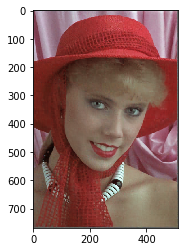

In [46]:
plt.imshow(denoisedw)

In [47]:
print('ssim with base image: ' + str(ssim(kodim04,denoised,multichannel=True)))
print('mse with base image: ' + str(mse(kodim04,denoised)))
print('PSNR: ' + str(psnr(kodim04,denoised)))

ssim with base image: 0.8827715513516283
mse with base image: 0.0009994031288652972
PSNR: 30.002592952308284


In [48]:
imwrite('test3.png',denoisedw)

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


### Experiments using CNNs to clean up image

In [49]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten


In [54]:
kodim04.shape

(768, 512, 3)

In [56]:
def block_image(image):
    arr = np.empty(shape=(48*32,256,3))
    for i in range(0,48):
        for j in range(0,32):
            arr[32*i + j] = image[i*16:i*16 + 16,j*16:j*16 + 16,:]
            
    return arr

In [57]:
y = block_image(kodim04)

In [58]:
y.shape

(1536, 16, 16, 3)

In [59]:
X = block_image(result)

In [60]:
X.shape

(1536, 16, 16, 3)

In [61]:
#denoiser
model = Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same',input_shape=(16,16,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(256,activation='sigmoid'))
model.compile(loss='mse',optimizer='adam')

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 16, 16, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
Total params: 67,184
Trainable params: 67,184
Non-trainable params: 0
__________________________________________________

In [63]:
from tensorflow import device
with device('/GPU:0'):
    model.fit(x=X, y=y, epochs= 1000, batch_size = 48, verbose=1)

ValueError: A target array with shape (1536, 16, 16, 3) was passed for an output of shape (None, 256) while using as loss `mean_squared_error`. This loss expects targets to have the same shape as the output.